In [1]:
# Define GMFP/LMFP function
import numpy as np

def gmfp(eeg_data):
    """
    Calculate Global Mean Field Power (GMFP) based on given EEG data.

    Parameters:
        eeg_data (numpy.ndarray): Epoched EEG data input matrix structured as channels * times.
        For example, if eeg_data has size 64 * 1000, it has 64 channels/electrodes and 1000 time points.

    Returns:
        gmfp (numpy.ndarray): Global Mean Field Power calculated based on the given EEG data as a vector with the same time length as eeg_data.

    """

    v_sum = 0

    v_mean = np.mean(eeg_data, axis=0)

    num_elec = eeg_data.shape[0]

    for ix_elec in range(num_elec):
        v_sum = (eeg_data[ix_elec, :] - v_mean) ** 2 + v_sum

    gmfp = np.sqrt(v_sum / num_elec)

    return gmfp



def lmfp(eeg_data, channel_num):
    """
    Calculate Local Mean Field Power (LMFP) based on given EEG data.

    Parameters:
        eeg_data (numpy.ndarray): Epoched EEG data input matrix structured as channels * times.
                                 For example, if eeg_data has size 64 * 1000, it has 64 channels/electrodes and 1000 time points.
        channel_num (list): The electrode locations of the selected region with respect to the eeg_data.
                            For example, if you want to use electrode 1, 4, and 8, then channel_num = [0, 3, 7]
                            Note that the indices are zero-based in Python.

    Returns:
        lmfp (numpy.ndarray): Global Mean Field Power calculated based on the given EEG data.

    """

    if len(channel_num) == 0:
        raise ValueError("Input argument is missing. Please specify which electrodes to be included.")
    else:
        v_sum = 0

        loc_eeg_data = eeg_data[channel_num, :]

        v_mean = np.mean(loc_eeg_data, axis=0)

        num_elec = loc_eeg_data.shape[0]

        for ix_elec in range(num_elec):
            v_sum = (loc_eeg_data[ix_elec, :] - v_mean) ** 2 + v_sum

        lmfp = np.sqrt(v_sum / num_elec)

        return lmfp

In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load variables
eeg_alpha_open = loadmat('example_data/eeg_open.mat')  # Load variable 'eeg_alpha_open'
eeg_alpha_close = loadmat('example_data/eeg_close.mat')  # Load variable 'eeg_alpha_close'

eeg_alpha_open = eeg_alpha_open['eeg_alpha_open']
eeg_alpha_close = eeg_alpha_close['eeg_alpha_close']

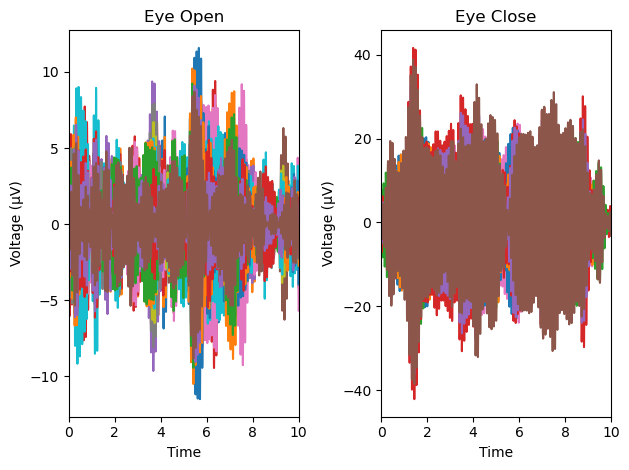

In [3]:
# Visualization of the EEG data
srate = 512
times_label = np.arange(1/srate, 10 + 1/srate, 1/srate)
plt.figure(1)
plt.clf()
plt.subplot(121)
plt.plot(times_label, eeg_alpha_open.T)
plt.xlim([0, 10])
plt.title('Eye Open')
plt.ylabel('Voltage (\u03BCV)')
plt.xlabel('Time')
plt.subplot(122)
plt.plot(times_label, eeg_alpha_close.T)
plt.xlim([0, 10])
plt.title('Eye Close')
plt.ylabel('Voltage (\u03BCV)')
plt.xlabel('Time')
plt.tight_layout()
plt.show()

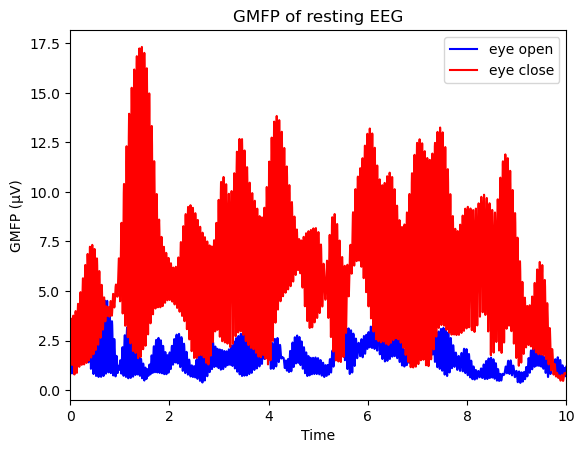

In [4]:
# Example usage
# Visulize GMFP results of two conditions
gmfp_open = gmfp(eeg_alpha_open);
gmfp_close = gmfp(eeg_alpha_close);
plt.figure(2)
plt.clf()
plt.plot(times_label, gmfp_open, 'blue')
plt.plot(times_label, gmfp_close, 'red')
plt.xlim([0, 10])
plt.title('GMFP of resting EEG')
plt.ylabel('GMFP (\u03BCV)')
plt.xlabel('Time')
plt.legend(['eye open', 'eye close'])
plt.show()

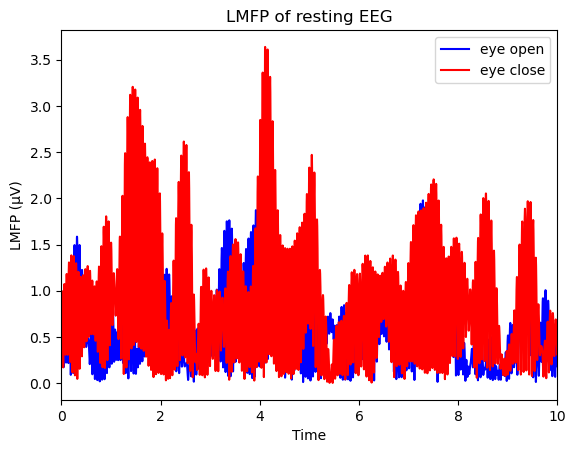

In [5]:
# Visualization of LMFP results at prefrontal region (FP1, FP2, Fz) of two conditions
elec_num = [0, 1, 4]  # Python indexing is zero-based: FP1(0), FP2(1), Fz(4)
lmfp_open = lmfp(eeg_alpha_open, elec_num)
lmfp_close = lmfp(eeg_alpha_close, elec_num)

plt.figure(3)
plt.clf()
plt.plot(times_label, lmfp_open, 'blue')
plt.plot(times_label, lmfp_close, 'red')
plt.xlim([0, 10])
plt.title('LMFP of resting EEG')
plt.ylabel('LMFP (\u03BCV)')
plt.xlabel('Time')
plt.legend(['eye open', 'eye close'])
plt.show()